# In this Notebook, we will attempt to use a Genetic Algorithm for designing our neural network


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os.path

import os
from tensorflow import logging
logging.set_verbosity(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Using TensorFlow backend.


In [2]:
import multiprocessing as mp

mp.cpu_count()

24

## Load in and scale the data

In [3]:
# create dataframe from csv
df = pd.read_csv("dataset2.csv")
df = df.sample(frac=1).reset_index(drop=True)

# store design parameters in numpy arrays
arm_length = np.array(df['Arm length (m)'][:]) 
ball_weight = np.array(df['Ball weight (kg)'][:]) 
ball_radius = np.array(df['Ball radius (mm)'][:]) 
air_temperature = np.array(df['Air temperature (deg C)'][:]) 
spring_constant = np.array(df['Spring constant (N per m)'][:]) 
device_weight = np.array(df['Device weight (kg)'][:]) 

# store outcome of catapault test in numpy array
target_hit = np.array(df['Target hit'][:]) 

#print(df)

In [4]:
# func to calculate range of data
def myrange(x):
    return max(x)-min(x)
from numpy import mean, std

# create matrix of scaling factors and save it in txt file to accompany the model
# first row contains offset (to be subtracted), second row contains factors (to be divided) 
scaling_factors = np.array([
    [min(arm_length), min(ball_weight), min(ball_radius),min(air_temperature),min(spring_constant),min(device_weight)],
    [myrange(arm_length),myrange(ball_weight),myrange(ball_radius),myrange(air_temperature),myrange(spring_constant),myrange(device_weight)]
])


np.savetxt('jones-charles-2.txt',scaling_factors)

# read the scaling file and apply scaling factors to the input data
givenname = 'Charles'
familyname = 'Jones'
dataset = 2
filebase = familyname.lower()+'-'+givenname.lower()+'-'+np.str(dataset)
if os.path.exists(filebase+'.txt'):
    print(filebase+'.txt exists - loading in scaling parameters')
    scaleArray = np.loadtxt(filebase+'.txt')
else:
    print(filebase + '.txt doesn\'t exist - assuming no scaling')
    scaleArray = np.array([np.zeros([6,]), np.ones([6,])])

# make the output data into a categorical datatype
y = to_categorical(target_hit)

# scale input data and store in array ready for model
x_unscaled = np.column_stack([arm_length, ball_weight, ball_radius, air_temperature, spring_constant, device_weight])
x = (x_unscaled-scaleArray[0,:])/scaleArray[1,:]

jones-charles-2.txt exists - loading in scaling parameters


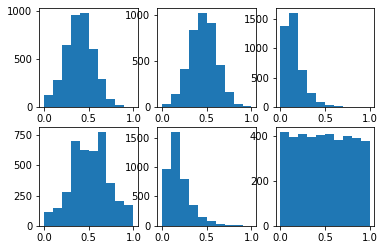

In [5]:
# check the distributions again to ensure nothing has gone wrong
fig, axs = plt.subplots(2,3)
i=0
for ax in axs.flat:
    ax.hist(x[:,i])
    i+=1

## Now, let's use the algorithm

In [6]:
from genetic_algorithm import *
from neural_network import *
from plot_tools import *
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def genetic_algorithm(pop_size, num_generations, num_species, X,Y):
    pool = mp.Pool(mp.cpu_count())

    # initialise gen 0
    population = initialise_population(pop_size)
    
    for i in range(num_generations):
        population = test_population(population, X,Y,pool) # get loss for each model
        population = speciation(population, num_species) # separate into K species
        np.savetxt("generation " + str(i),population) # save population data for this gen
        
        plot_population(population)
        population = generate_next_gen(population, num_species)
        print("End of Gen "+ str(i))
    pool.close()
    pool.join()

Note: here it is only run with 20 individuals for 5 generations, whereas it was run with 100 individuals for 10 generations in the full test

Epoch 00081: early stopping
Epoch 00063: early stopping
Epoch 00051: early stopping
Epoch 00055: early stopping
Epoch 00120: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00072: early stopping
Epoch 00176: early stopping
Epoch 00051: early stopping
Epoch 00072: early stopping
Epoch 00092: early stopping
Epoch 00210: early stopping
Epoch 00359: early stopping
Epoch 00254: early stopping
Epoch 00348: early stopping
End of Gen 0
Epoch 00056: early stopping
Epoch 00053: early stopping
Epoch 00076: early stopping
Epoch 00067: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00051: early stopping
Epoch 00052: early stopping
Epoch 00103: early stopping
Epoch 00103: early stopping
Epoch 00171: early stopping
Epoch 00059: early stopping
Epoch 00052: early stopping
Epoch 00052: early stopping
Epoch 00058: early stopping
Epoch 00144: early stopping
Epoch 00130: early stopping
Epoch 0

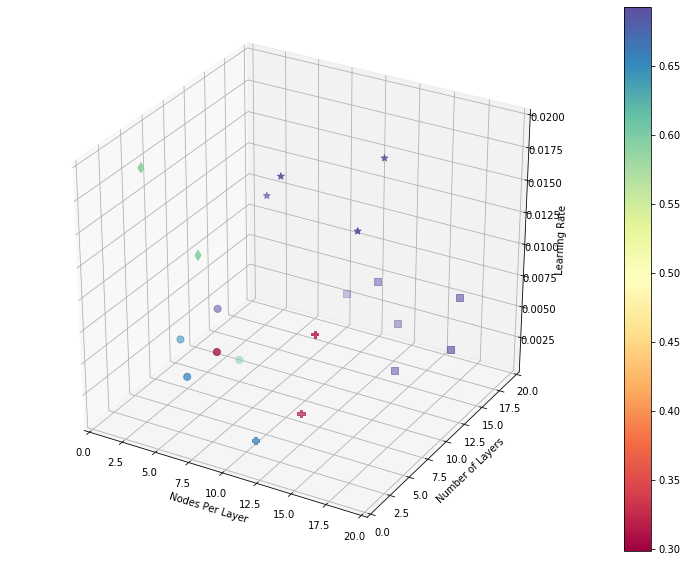

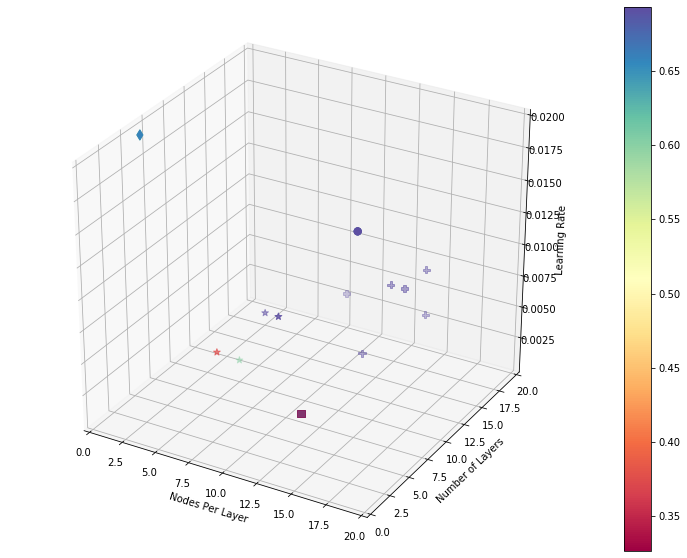

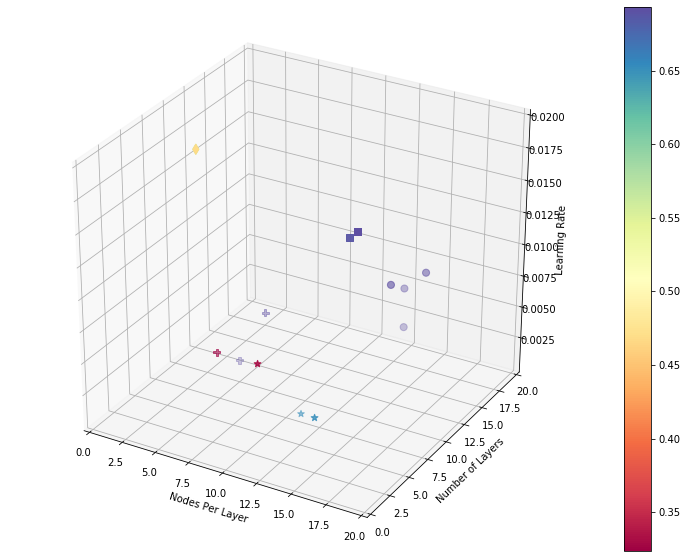

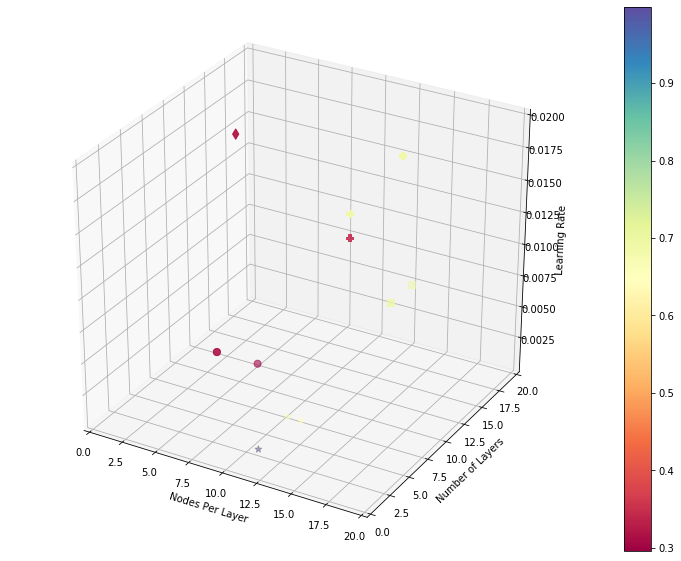

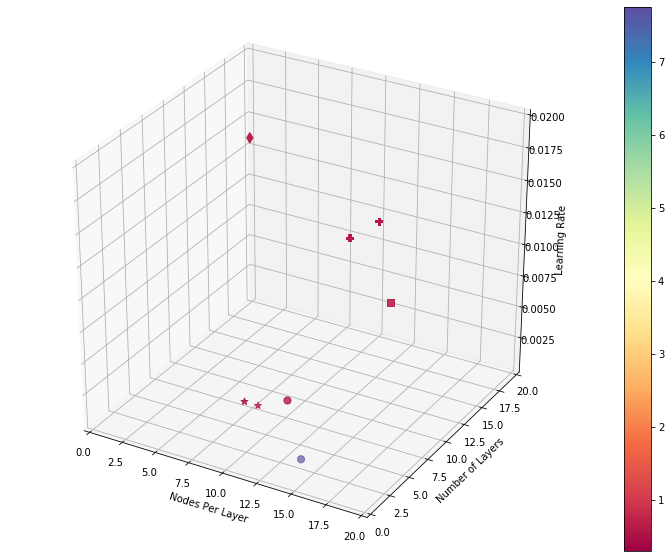

In [7]:
genetic_algorithm(20,5,5,x,y)